## HDSC - Regression with Cars' Data 

In [47]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [25]:
df = pd.read_csv("/content/cars.csv")
df.shape

(7205, 9)

In [5]:
data.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7205 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7205 non-null   object 
 8   Distance                7205 non-null   object 
dtypes: float64(1), object(8)
memory usage: 506.7+ KB


### Data Cleaning

In [26]:
# clean year and distance coumns
df.Year = df.Year.str.replace(',','')
df.Distance = df.Distance.str.replace(',','')

In [27]:
# Handling missing values
df.isna().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [29]:
df.Year.fillna(df.Year.median(), inplace=True)
df['Amount (Million Naira)'].fillna(df['Amount (Million Naira)'].median(), inplace=True)
df.Type.fillna(method = 'ffill', inplace=True)
df.Distance.fillna(df.Distance.median(), inplace=True)

In [32]:
# Handle Data types
df.Year = df.Year.astype(int)
df.Distance = df.Distance.astype(float)

In [34]:
# Drop the 1st column
df.drop(['VehicleID'], axis=1, inplace=True)

In [36]:
df.head()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used,80830.0
1,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used,125000.0
2,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used,110852.0
3,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used,30000.0
4,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used,125206.0


### Modelling

In [42]:
categ_col = df.select_dtypes(include = ['object', 'category']).columns
num_col = [col for col in df.columns if col not in categ_col]

In [43]:
# Label encoding
le = LabelEncoder()

for i in categ_col:
  df[i] = le.fit_transform(df[i])

In [44]:
df.head()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,0,17,117,2011,16,2.2,2,80830.0
1,1,19,1049,2012,16,3.5,2,125000.0
2,2,29,908,2010,15,9.2,1,110852.0
3,0,34,508,2017,2,22.8,1,30000.0
4,1,52,569,2002,15,2.6,2,125206.0


In [49]:
# Train Test Split
X = df.drop("Amount (Million Naira)", axis=1)
y = df["Amount (Million Naira)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Models Dict
models = {'Linear Regression': LinearRegression(), 'Ridge Regression': Ridge(), 'Suppport vector machine': SVR(),
          'KNN Regressor': KNeighborsRegressor(), 'Decision Tree Regressor': DecisionTreeRegressor(), 
          'Random Forest Regressor':RandomForestRegressor(), 
          'Gradient Boosting Regressor': GradientBoostingRegressor(), 
          'CatBoost Regressor': CatBoostRegressor(), 'XGBoost Regressor':XGBRegressor()}

In [52]:
# make a function that iletrate trough the models and evaluates them
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  fits and evaluates the given machine learning models
  """
  np.random.seed(42)
  model_scores = {}
  
  for name, model in models.items():
    model.fit(X_train, y_train)
    model_scores[name] = model.score(X_test, y_test)
  return model_scores

In [53]:
scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
scores

Learning rate set to 0.053998
0:	learn: 24.2997802	total: 49.7ms	remaining: 49.7s
1:	learn: 23.6969802	total: 51.5ms	remaining: 25.7s
2:	learn: 23.1121691	total: 53.4ms	remaining: 17.7s
3:	learn: 22.5823190	total: 56.4ms	remaining: 14s
4:	learn: 22.0587442	total: 59.1ms	remaining: 11.8s
5:	learn: 21.6019408	total: 61.3ms	remaining: 10.1s
6:	learn: 21.1757395	total: 63.4ms	remaining: 9s
7:	learn: 20.7297515	total: 65.5ms	remaining: 8.12s
8:	learn: 20.3103981	total: 67.5ms	remaining: 7.43s
9:	learn: 19.9328718	total: 69.5ms	remaining: 6.88s
10:	learn: 19.5607276	total: 71.5ms	remaining: 6.43s
11:	learn: 19.2037371	total: 73.8ms	remaining: 6.08s
12:	learn: 18.9074189	total: 75.5ms	remaining: 5.73s
13:	learn: 18.6258471	total: 77.8ms	remaining: 5.48s
14:	learn: 18.3018805	total: 79.6ms	remaining: 5.23s
15:	learn: 18.0415183	total: 81.6ms	remaining: 5.02s
16:	learn: 17.7540536	total: 83.6ms	remaining: 4.83s
17:	learn: 17.4795308	total: 85.5ms	remaining: 4.67s
18:	learn: 17.2577730	total: 87

{'Linear Regression': 0.23057857215379263,
 'Ridge Regression': 0.23057343727713675,
 'Suppport vector machine': 0.05181823243238337,
 'KNN Regressor': 0.5627346078120761,
 'Decision Tree Regressor': 0.709426020919504,
 'Random Forest Regressor': 0.8139507439528324,
 'Gradient Boosting Regressor': 0.8569972410166743,
 'CatBoost Regressor': 0.8795632124331347,
 'XGBoost Regressor': 0.8525948714651341}

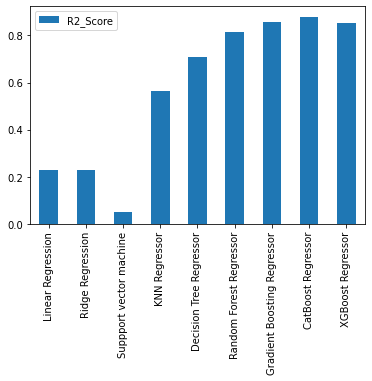

In [56]:
model_compare = pd.DataFrame(scores, index=['R2_Score'])
model_compare.T.plot.bar() # T means transpose to improve the bar

### CatBoost Model

In [58]:
ctb_model = CatBoostRegressor()
ctb_model.fit(X_train, y_train)

Learning rate set to 0.053998
0:	learn: 24.2997802	total: 8.79ms	remaining: 8.79s
1:	learn: 23.6969802	total: 17.2ms	remaining: 8.59s
2:	learn: 23.1121691	total: 25.6ms	remaining: 8.51s
3:	learn: 22.5823190	total: 31.3ms	remaining: 7.78s
4:	learn: 22.0587442	total: 37.7ms	remaining: 7.51s
5:	learn: 21.6019408	total: 57.2ms	remaining: 9.47s
6:	learn: 21.1757395	total: 70.4ms	remaining: 9.98s
7:	learn: 20.7297515	total: 78.9ms	remaining: 9.78s
8:	learn: 20.3103981	total: 87ms	remaining: 9.58s
9:	learn: 19.9328718	total: 102ms	remaining: 10.1s
10:	learn: 19.5607276	total: 106ms	remaining: 9.56s
11:	learn: 19.2037371	total: 112ms	remaining: 9.19s
12:	learn: 18.9074189	total: 124ms	remaining: 9.4s
13:	learn: 18.6258471	total: 133ms	remaining: 9.39s
14:	learn: 18.3018805	total: 142ms	remaining: 9.3s
15:	learn: 18.0415183	total: 161ms	remaining: 9.92s
16:	learn: 17.7540536	total: 172ms	remaining: 9.97s
17:	learn: 17.4795308	total: 182ms	remaining: 9.95s
18:	learn: 17.2577730	total: 192ms	rema

In [59]:
# R2 Score
ctb_model.score(X_test, y_test)

0.8795632124331347

In [60]:
# Predictions
y_pred = ctb_model.predict(X_test)

### Model Evaluation
R2 or R-Squared is the coefficient of determination 
,MAE mean absolute error
,MSE mean squared error

In [61]:
MAE = mean_absolute_error(y_test, y_pred)
MAE

3.0758226696260555

In [62]:
MSE = mean_squared_error(y_test, y_pred)
MSE

85.0420329278715

In [63]:
np.sqrt(MSE)

9.221823731121274

In [64]:
df2 = pd.DataFrame({"Actual values": y_test, "Predictions": y_pred})
df2

,Actual values,Predictions
3252,6.50,8.485289
1535,16.00,11.376558
6337,56.00,51.319485
177,2.59,2.945530
230,25.00,19.183889
...,...,...
5230,18.00,29.379585
6476,7.40,6.865625
4949,2.00,1.235419
1886,3.90,9.797850


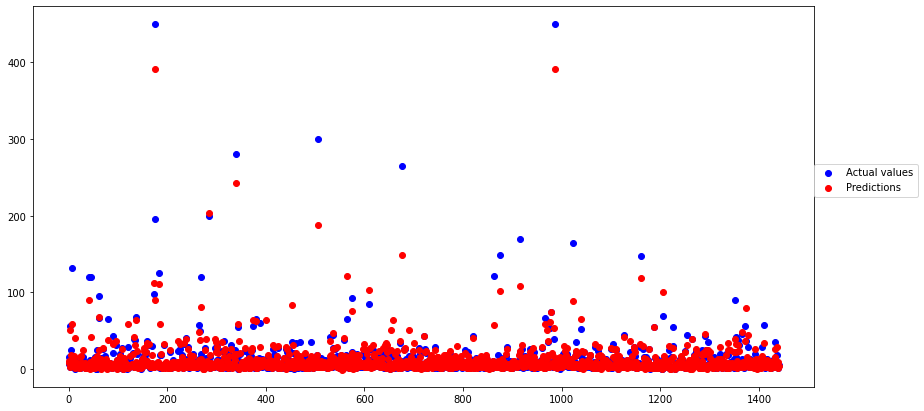

In [65]:
fig, ax = plt.subplots(figsize = (14,7))

x = np.arange(0, len(df2), 1)
ax.scatter(x, df2['Actual values'], c='b', label='Actual values')
ax.scatter(x, df2["Predictions"], c='r', label='Predictions')
ax.legend(loc=(1, 0.5))

### Features importance visualization

In [67]:
def plot_importances(columns, importances, n=20):
  df3 = (pd.DataFrame({'features': columns, 'feature_importances': importances})
  .sort_values('feature_importances', ascending=False).reset_index(drop=False))

  # plotting the df
  fig, ax = plt.subplots(figsize = (10,8))
  ax = sns.barplot(x = 'feature_importances', y='features', data= df3[:n], orient='h')
  plt.ylabel('features')
  plt.xlabel('feature importances')

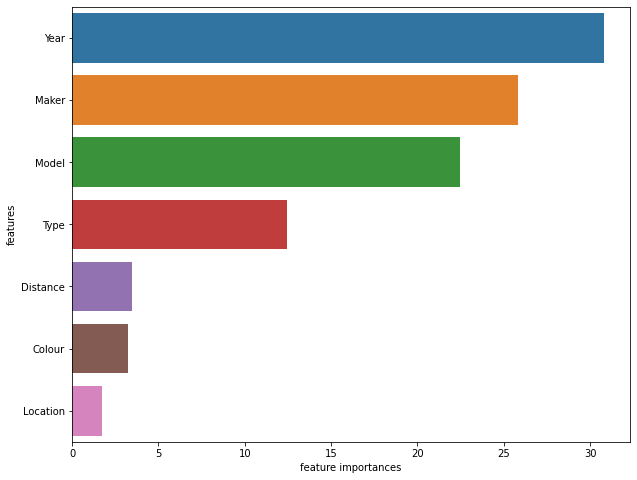

In [68]:
plot_importances(X_train.columns, ctb_model.feature_importances_)